# lecture05_金融数据的统计分析
b站链接：https://www.bilibili.com/video/av20727707/?p=7

本节重点：
1. 分析HS300股票的市值和PE的统计规律
2. 个股日收益率的统计规律研究
3. 金融数据分析中的随机数

## 分析HS300股票的市值和PE的统计规律
### pandas.describe()方法
- skew: 偏度
- kurt: 峰度

### numpy通用方法
- np.max / np.mean / np.min
- np.sum / np.std / np.median / np.Series.quantile(0,1) 分位数
- np.Series.skew() / np.Series.kurt()

### 分布情况
- 直方图: Series.hist()

In [1]:
import tushare as ts

# df = ts.get_hist_data(
#         '600030', 
#         start='2018-01-01', 
#         end='2018-01-31'
# )

def stock_data(code, start, end):
    df = ts.get_hist_data(code, start, end)
    return(df)

In [7]:
# 获得HS300指数20180322的成份股
code_HS300 = '600030'
stock_data(code_HS300, '2018-03-22', '2018-03-22')

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-03-22,18.7,19.13,18.78,18.57,1509102.88,0.28,1.51,18.566,18.747,18.481,1181891.61,1225680.18,1282672.8


In [ ]:
# 获得HS300成份股的日估值数据
stock_data(code_HS300, '2018-03-22', '2018-03-28')

## 个股日收益率的统计规律研究
- 几个重要方法
        DataFrame.set_index()
        DataFrame.dropna()
        Series.shift(1)
        Series 加减乘除 Series
        np.log(Series)

In [17]:
# 查询日收盘价信息
# 招商银行600036.SH
import pandas as pd
df2 = stock_data('600036', '2010-01-01', '2018-03-22')
df2.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-03-22,31.28,31.53,31.24,30.56,446275.25,-0.02,-0.06,30.864,30.807,30.745,420914.57,392029.29,467287.14
2018-03-21,31.28,31.80,31.28,31.12,585145.44,0.29,0.94,30.724,30.774,30.758,380051.48,387902.49,478857.43
2018-03-20,30.55,31.10,30.97,30.51,382394.59,0.26,0.85,30.548,30.722,30.763,315657.59,413621.39,466347.31
2018-03-19,30.01,30.74,30.69,29.90,322733.31,0.56,1.86,30.510,30.635,30.759,313928.05,437265.58,487190.96
2018-03-16,30.57,30.68,30.14,30.10,368024.28,-0.38,-1.25,30.542,30.582,30.727,365728.77,438612.37,514902.61


In [18]:
# 计算每日的对数收益率
change = df2['close'] / df2['close'].shift(1)
df2['ret'] = np.log(change)

In [19]:
# 删除第一个NA值
df2.dropna(inplace=True)
print(df2)

             open   high  close    low      volume  price_change  p_change  \
date                                                                         
2018-03-21  31.28  31.80  31.28  31.12   585145.44          0.29      0.94   
2018-03-20  30.55  31.10  30.97  30.51   382394.59          0.26      0.85   
2018-03-19  30.01  30.74  30.69  29.90   322733.31          0.56      1.86   
2018-03-16  30.57  30.68  30.14  30.10   368024.28         -0.38     -1.25   
2018-03-15  30.21  30.68  30.54  30.21   241959.77          0.15      0.49   
2018-03-14  30.57  30.60  30.40  30.21   263176.00         -0.33     -1.07   
2018-03-13  30.90  31.38  30.78  30.63   373746.88         -0.06     -0.20   
2018-03-12  31.44  31.49  30.85  30.80   581736.94         -0.30     -0.96   
2018-03-09  31.20  31.50  31.18  30.98   355100.44          0.26      0.84   
2018-03-08  30.85  31.06  30.91  30.41   405007.22          0.14      0.46   
2018-03-07  30.50  31.08  30.76  30.35   842334.44          0.72

In [20]:
# 计算日收益率的统计规律
# calc_stat('return on 600036', df2['ret'])

NameError: name 'calc_stat' is not defined

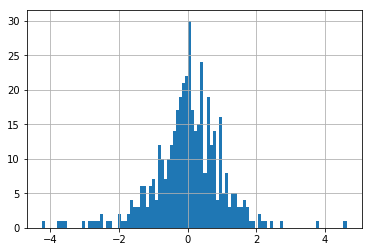

In [24]:
# normalize return
mean = np.mean(df2['ret'])
std = np.std(df2['ret'])
df2['ret_norm'] = (df2['ret']-mean)/std

# 直方图
%matplotlib inline
df2['ret_norm'].hist(bins=100)

# 结论：不然全是正态分布

### 正态分布的检验

In [25]:
# QQ-plot图
import scipy.stats as stats
import matplotlib.pyplot as plt

((array([-2.9436222 , -2.65743268, -2.49618611, -2.38168756, -2.29186642,
         -2.21743774, -2.15358115, -2.09746001, -2.04725846, -2.00174137,
         -1.96002905, -1.92147195, -1.88557628, -1.85195757, -1.82031034,
         -1.79038776, -1.76198733, -1.73494088, -1.70910707, -1.68436599,
         -1.66061498, -1.63776541, -1.61574027, -1.59447216, -1.57390177,
         -1.55397659, -1.53464993, -1.51588006, -1.49762956, -1.47986468,
         -1.46255493, -1.44567263, -1.4291926 , -1.41309183, -1.39734927,
         -1.3819456 , -1.36686302, -1.35208512, -1.33759674, -1.32338383,
         -1.30943333, -1.29573312, -1.28227188, -1.26903907, -1.25602483,
         -1.2432199 , -1.23061565, -1.21820392, -1.20597707, -1.1939279 ,
         -1.18204962, -1.17033582, -1.15878044, -1.14737775, -1.13612232,
         -1.12500902, -1.11403294, -1.10318947, -1.09247418, -1.08188287,
         -1.07141156, -1.06105643, -1.05081384, -1.04068033, -1.03065256,
         -1.02072738, -1.01090175, -1.

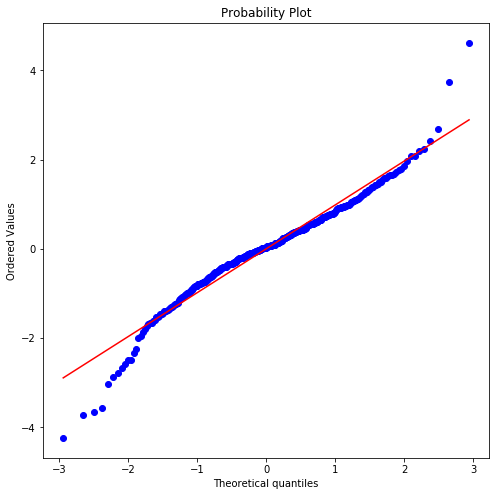

In [26]:
plt.figure(figsize=(8, 8))
stats.probplot(
        df2['ret_norm'], 
        dist='norm', 
        plot=plt
)

# probplot如何只看图像不看数据

In [27]:
# 正态分布检验
print(stats.normaltest(df2['ret_norm']))
print(stats.shapiro(df2['ret_norm']))

NormaltestResult(statistic=43.3943514461366, pvalue=3.776037603818938e-10)
(0.9582958817481995, 1.224788270803856e-09)


结论：p值太小，不符合正态分布的特点

### 计算累计收益率
- Series.apply(func)
        对每个元素调用func，返回另一个Series
- Series.cumsum()  累加
$$y_1=x_1$$
$$y_2=x_1+x_2$$
$$y_3=x_1+x_2+x_3$$
$$y_4=x_1+x_2+x_3+x_4$$

In [30]:
import datetime
def int2datetime(date):
    df3 = datetime.datetime.strptime(str(date), '%Y-%m-%d')
    return(df3)

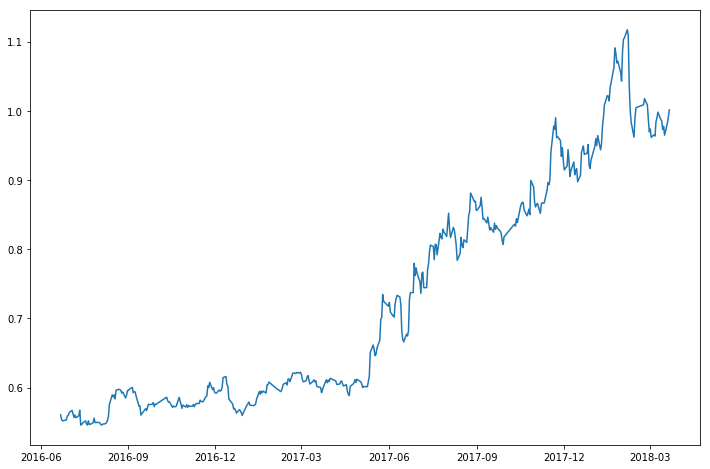

In [31]:
# 计算累计收益率 cumsum, cumprod
cum_ret = df2['ret'].cumsum().apply(np.exp)
x_axis = pd.Series(cum_ret.index).apply(int2datetime)

plt.figure(figsize=(12,8))
plt.plot(x_axis, cum_ret)

## 金融数据分析中的随机数
- np.random.random()
- np.random.normal()
- np.random.randint()


- scipy.stats.normaltest()
- scipy.stats.kstest()

In [ ]:
import numpy as np
import math

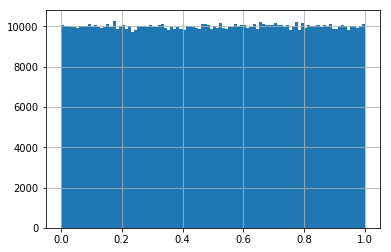

In [32]:
# 一维随机数组，【0,1】间的均匀分布
sim_data = np.random.random(1000000)
pd.Series(sim_data).hist(bins=100)

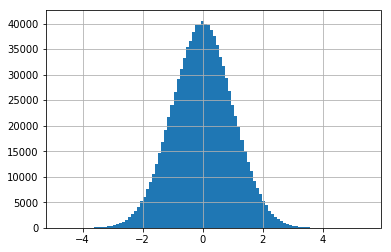

In [33]:
# 一维随机数组，【0,1】间的正态分布
sim_data = np.random.normal(0,1,1000000)
pd.Series(sim_data).hist(bins=100)

In [34]:
# 二维随机数组，【0,1】间的均匀分布
sim_data=np.random.rand(5,5)
print(sim_data)
print(stats.kstest(sim_data, 'uniform'))

[[0.34719932 0.24785989 0.4952416  0.97140653 0.59367136]
 [0.15743814 0.63686865 0.53766874 0.04262801 0.18973498]
 [0.4076519  0.97981078 0.42524179 0.90740729 0.02609096]
 [0.22955402 0.04796134 0.71630901 0.43933145 0.25355929]
 [0.57164663 0.31816479 0.8069597  0.05945555 0.47403904]]
KstestResult(statistic=0.4102650172677985, pvalue=0.2827299740956888)


In [35]:
# 产生某一段区间内的随机数，均匀分布
sim_data = np.random.randint(10,20,1000000)
calc_stat('uniform sample data', sim_data)

NameError: name 'calc_stat' is not defined

### 利用模特卡罗模拟计算

扇形面积 = 蓝点/（蓝点+红点）<br>
扔的点越多，结果误差越小

3.288


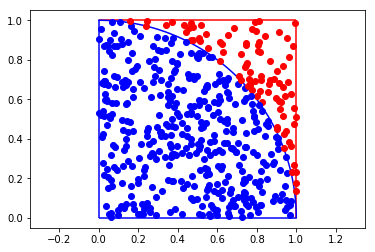

In [50]:
# 画一个扇形和正方形
r = 1.0
a, b =(0, 0)

# 方法、参数方程
theta = np.arange(0, 0.5*np.pi, 0.01)
x= a+r*np.cos(theta)
y=b+r*np.sin(theta)

fig=plt.figure()
axes=fig.add_subplot(111)
axes.plot(x,y,color='blue')

axes.hlines(0,0,1,color='blue')
axes.hlines(1,0,1,color='red')
axes.vlines(0,0,1,color='blue')
axes.vlines(1,0,1,color='red')

axes.axis('equal')

import math
# 随机模拟，点落到扇形内部有效
size = 500
x = np.random.rand(size)
y = np.random.rand(size)

count = 0
for i in range(size):
    temp = math.pow(x[i], 2) + math.pow(y[i], 2)
    if temp <= 1:
        axes.plot(x[i], y[i], 'bo')
        count = count +1
    else:
        axes.plot(x[i], y[i], 'ro')
my_pi = count/size*4
print(my_pi)